
<p style="text-align: center;">
  <img src="https://upload.wikimedia.org/wikipedia/fr/thumb/2/2c/Universit%C3%A9_Panth%C3%A9on-Sorbonne_%28depuis_janvier_2015%29.svg/1200px-Universit%C3%A9_Panth%C3%A9on-Sorbonne_%28depuis_janvier_2015%29.svg.png?20161020031138" alt="Description de l'image" style="width: 30%;"/>
</p>



<h1 style="text-align: center; color: #0c3c6c; font-size: 35px;">PROJET : ÉCONOMÉTRIE DES MODÈLES LINÉAIRES</h1>


<h1 style="text-align: center; color: #0c3c6c; font-size: 25px;"> <i>AÏSSATOU DIENG - ÉLODIE HUTIN - HUGO LEMONNIER - CAMILLE LOEGEL-ORTS</i></h1>

# Introduction


En 2007, la neuvième élection présidentielle de la Vème République, marquée par un taux de participation exceptionnellement élevé, a conduit à l'élection de Nicolas Sarkozy en tant que 6ème président de la République Française. Cette élection a été caractérisée par une compétition intense entre plus de 16 candidats initiaux, parmi lesquels seuls 10 ont finalement concouru lors du scrutin.

Dans le cadre du processus électoral français, les instituts de sondage mènent systématiquement des enquêtes d'opinion avant chaque élection pour évaluer les tendances et les préférences des électeurs à l'égard des différents candidats en lice. Ces enquêtes impliquent la sélection d'un échantillon représentatif de la population française, à qui sont posées des questions portant sur divers aspects de leur vie personnelle, leurs opinions sur les questions d'actualité et, de manière cruciale, leur intention de vote. Les résultats de ces enquêtes sont ensuite analysés pour fournir une estimation de la popularité de chaque candidat à différents moments avant le jour du scrutin. Ces baromètres sont souvent suivis de près par les médias, les politiciens et le public en général, car ils peuvent fournir des indications sur les dynamiques politiques en cours et influencer les stratégies de campagne des candidats.


Dans le cadre de ce projet en économétrie non linéaire, nous avons à notre disposition les résultats de la première vague du baromètre politique concernant les élections présidentielles de 2007. Nous avons choisi de nous focaliser sur la modélisation de la probabilité de vote en faveur de la candidate représentant le parti des Verts, **Dominique Voynet**.

Notre objectif principal est de comprendre les déterminants de la probabilité de vote pour cette candidate.

Avec un ensemble considérable de variables explicatives disponibles, notre démarche consistera premièrement à sélectionner les variables les plus pertinentes, celles qui ont le plus d'influence sur la probabilité de vote pour notre candidate.

Ensuite, nous mettrons en œuvre une régression logistique, une technique statistique adaptée aux variables dépendantes binaires, afin de modéliser la relation entre la probabilité de vote et les variables explicatives sélectionnées.

Enfin, nous explorerons la construction d'un réseau bayésien pour représenter de manière explicite les dépendances probabilistes entre nos variables, offrant ainsi une perspective supplémentaire sur les interactions complexes au sein du processus de vote.
En utilisant ces méthodes, nous espérons mieux comprendre ce qui a influencé les électeurs à voter pour Dominique Voynet lors des élections présidentielles de 2007.

## Importation des données et librairies nécessaires

In [26]:
import pyreadstat
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import chi2_contingency

from celer import GroupLasso,GroupLassoCV

from itertools import combinations
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNetCV, LassoCV, Lasso,lars_path,Ridge,RidgeCV,LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, precision_score, recall_score, f1_score,confusion_matrix
from pgmpy.models import BayesianNetwork,BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator, BayesianEstimator
from pgmpy.estimators.CITests import chi_square
from pgmpy.inference.CausalInference import CausalInference


import pyAgrum as gum
import networkx as nx

In [6]:
df, meta = pyreadstat.read_sav("/Users/elodie/Documents/Master 2/S1/Économétrie non linéaire/Projet/votes.sav")

In [7]:
df

,QUEST,VAGUE,DATE_TER,DPT,REG,CCM,AGGLO,GR,REGA,NATIO,...,RCRS13,RCRS15,RCPRE,RCREG,REFPROX,RED1,RED2,RED3,RED4,REDDEF
0,1.0,1.0,1.336271e+10,43.0,8.0,6.0,1.0,5.0,83.0,1.0,...,3.0,2.0,4.0,3.0,4.0,93286.0,93079.0,115671.0,138610.0,0.93286
1,2.0,1.0,1.336271e+10,19.0,7.0,6.0,1.0,5.0,74.0,1.0,...,3.0,4.0,2.0,2.0,3.0,75467.0,79476.0,83044.0,73570.0,0.75467
2,3.0,1.0,1.336271e+10,19.0,7.0,1.0,3.0,5.0,74.0,1.0,...,1.0,2.0,2.0,7.0,3.0,76974.0,64144.0,119251.0,121849.0,0.76974
3,4.0,1.0,1.336271e+10,18.0,5.0,2.0,1.0,5.0,24.0,1.0,...,3.0,2.0,1.0,3.0,5.0,222342.0,179811.0,112919.0,135954.0,2.22342
4,5.0,1.0,1.336297e+10,43.0,8.0,4.0,2.0,5.0,83.0,1.0,...,3.0,2.0,7.0,7.0,3.0,137731.0,124963.0,104551.0,110822.0,1.37731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5645,5646.0,1.0,1.336297e+10,81.0,7.0,1.0,3.0,3.0,73.0,1.0,...,3.0,2.0,7.0,4.0,4.0,138827.0,247272.0,89199.0,261463.0,1.38827
5646,5647.0,1.0,1.336297e+10,65.0,7.0,1.0,3.0,3.0,73.0,1.0,...,1.0,2.0,6.0,7.0,3.0,188565.0,114400.0,157698.0,167757.0,1.88565
5647,5648.0,1.0,1.336297e+10,46.0,7.0,1.0,3.0,3.0,73.0,1.0,...,3.0,4.0,5.0,2.0,1.0,77395.0,97742.0,71277.0,51534.0,0.77395
5648,5649.0,1.0,1.336297e+10,46.0,7.0,1.0,3.0,3.0,73.0,1.0,...,3.0,4.0,1.0,2.0,3.0,22543.0,37974.0,92590.0,67622.0,0.22543


## Analyse préliminaire du jeu de données complet

Nous commençons par examiner notre ensemble de données pour déterminer s'il est nécessaire d'effectuer des transformations ou des opérations de nettoyage avant de débuter nos analyses.

In [8]:
def stat(df):
  # Nombre de lignes et de colonnes
    df.info()
    num_rows, num_cols = df.shape

  # Variables quantitatives
    quantitative_vars = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    num_quantitative_vars = len(quantitative_vars)

  # Variables qualitatives
    qualitative_vars = df.select_dtypes('object').columns.tolist()
    num_qualitative_vars = len(qualitative_vars)

  # Valeurs manquantes
    total_missing_values = df.isna().sum().sum()

  #Valeurs nulles
    valeurs_nulles=(df==0).sum().sum()
  # Doublons
    num_duplicates = df.duplicated().sum()

  # Récapitulatif
    summary = {"Informations": ["Nombre de lignes", "Nombre de colonnes", "Variables quantitatives", "Variables qualitatives", "Valeurs manquantes", "Valeurs nulles","Doublons"],
    "Effectifs": [num_rows, num_cols, num_quantitative_vars, num_qualitative_vars, total_missing_values,valeurs_nulles, num_duplicates],}
    summary_df = pd.DataFrame(summary)
    return(summary_df)

stat(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5650 entries, 0 to 5649
Columns: 236 entries, QUEST to REDDEF
dtypes: float64(236)
memory usage: 10.2 MB


,Informations,Effectifs
0,Nombre de lignes,5650
1,Nombre de colonnes,236
2,Variables quantitatives,236
3,Variables qualitatives,0
4,Valeurs manquantes,598317
5,Valeurs nulles,601
6,Doublons,0


La base de données comprend 5650 lignes et 236 colonnes, représentant respectivement les 5650 Français interrogés dans le cadre de ce baromètre politique et les 236 questions qui leur ont été posées. Toutes les variables sont quantitatives, étant donné que les questions étaient à choix unique et que les réponses ont été encodées par des chiffres pour faciliter le traitement des données. Nous constatons la présence de plus de 598 000 valeurs manquantes, correspondant à des non-réponses des répondants, et nous ne sommes donc pas en mesure de les remplacer. Aucun doublon n'a été identifié, ce qui indique l'absence de répondants similaires ou de réponses multiples d'une même personne.

Dans la suite de notre étude, nous limiterons notre analyse à un sous-ensemble de variables parmi les 236 disponibles. Notre intérêt se portera principalement sur deux types de variables : celles relatives au contexte social du répondant, incluant des informations contextuelles, et celles concernant les opinions du répondant sur divers sujets d'actualité et politiques.

Il est important de rappeler que notre variable cible est la probabilité de vote des répondants pour la candidate Dominique Voynet. Cette variable est codée comme suit : 1=Tout à fait probable, 2=Plutôt probable, 3=Plutôt pas probable, 4=Pas probable du tout, 5=Ne connaît pas, 6=Ne sait pas. Pour adapter cette variable à une analyse de régression logistique, nous la codons en 1 si la personne est tout à fait probable ou plutôt probable de voter pour Dominique Voynet, et en 0 sinon.

In [9]:
df['Proba_Vote'] = df['Q46P'].apply(lambda x: 1 if x in [1,2] else 0)

Examinons la répartition des réponses des Français concernant notre variable d'intérêt :







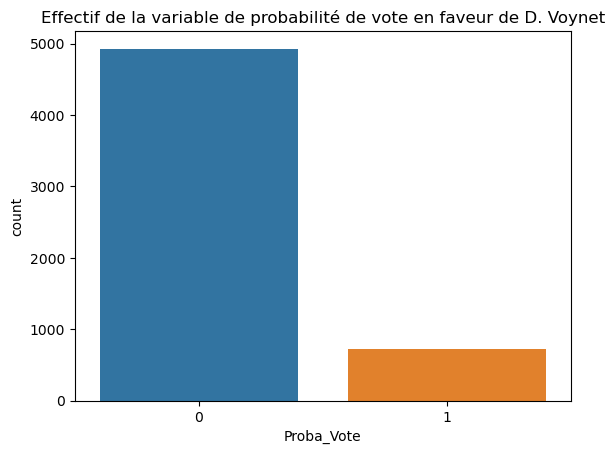

In [10]:
df['Proba_Vote'].value_counts()

sns.countplot(x="Proba_Vote",data=df)
plt.title(f"Effectif de la variable de probabilité de vote en faveur de D. Voynet")
plt.show()

On constate que la probabilité de vote pour notre candidate est faible, puisque plus de 85% de l'échantillon ont indiqué ne pas envisager de voter pour elle le jour des élections


# Partie 1 - Sélection de variables et régression logistique

 Le but de cette partie est de réaliser une sélection de variable sur notre base de données afin d'obtenir un modèle dit "sparse". La sparcité advient quand le vecteur des coefficients, *Bêta*, de nos variables contient une proportion majeure de 0.

 Il s'agit donc ici d'identifier, au travers de la régression logistique et d'une autre méthode, les variables qui contiennent le plus d'information relative au vote pour notre candidate Voynet.

 Nous réalisons deux modèles distincts : le premier sur les variables de contexte et le second sur les variables d'opinion. Pour réaliser chaque modèle nous allons dans un premier temps créer un dataframe contenant uniquement les variables intéressées, puis nous y appliquerons une **régression logistique** ainsi qu'un **group LASSO** afin d'effectuer notre sélection de variables.

## 1.1 - Modèle sur les variables de contexte

Pour rappel, voici la liste des variables de contexte ainsi que leurs différentes modalités, sur laquelle nous devons effectuer une sélection pour obtenir le modèle final de régression logistique optimal.

- (a) **Diplôme le plus élevé** (RCRS2) :
  - 1=Sans diplôme - 2=CAP - 3=Baccalauréat - 4= Niveau Bac+2 - 5= Diplôme de l'enseignement supérieur
- (b) **Profession** (RCRS7) :
  - 1=Agriculteur - 2=Artisan, commerçant, chef d'entreprise - 3=Profession libérale, cadre supérieur 4= Enseignant - 5=Profession intermédiaire - 6=Employé - 7=Ouvrier - 8= Etudiant - 9=N'a jamais travaillé
- (c) **Origine Parents** (RCRS13)
  - 1= A un parent d'origine étrangère - 2=N'a qu'un grand parent - 3=N'a pas d'ascendance étrangère - 4=Nsp
- (d) **Tranche d’âge** (RAGE)
  - 1=18-24 ans - 2=25-34 ans - 3=35-49 ans - 4=50-64 ans  - 5= 65 ans et plus
- (e) **Sexe** (SEXE)
  - 1=Homme - 2=Femme
- (f) **Grande Région** (GR)
  - 1=GRAND NORD - 2=GRAND OUEST - 3=GRAND SUD OUEST - 4=GRAND SUD EST - 5=GRAND CENTRE - 6=GRAND EST - 7=ILE DE FRANCE
- (g) **Situation professionnelle** (RRS8)
  - 1=Travaille - 2=Chômage - 3=Retraité - 4=Au foyer - 5=Elève, étudiant - 6=Autre - 7Nsp
- (h) **Situation familiale** (Q48)
  - 1=Célibataire - 2=Marié(e) 3=Vivant en couple sans être marié(e) - 4=Pacsé(e) - 5=Divorcé(e) ne vivant pas en couple - 6=Divorcé(e) vivant en couple - 7=Veuf ou veuve ne vivant pas en couple - 8=Veuf ou veuve vivant en couple - 9=Nsp
- (i) **Religion** (RCRS15)
  - 1=Catholique pratiquant - 2=Catholique non pratiquant - 3=Autre religion - 4=Sans religion - 5=Nsp
                           


On crée notre dataframe de contexte :

In [11]:
df_contexte=df[['Proba_Vote','RCRS2','RCRS7','RCRS13','RAGE','SEXE','GR','RRS8','Q48','RCRS15']]
df_contexte = df_contexte.rename(columns={'RCRS2': 'Diplome','RCRS7':'Profession','RCRS13':'Origine','RAGE':'Age','SEXE':'Sexe','GR':'Region','RRS8':'Situ_pro','Q48':'Situ_fam','RCRS15':'Religion'})

df_contexte

,Proba_Vote,Diplome,Profession,Origine,Age,Sexe,Region,Situ_pro,Situ_fam,Religion
0,0,2.0,5.0,3.0,2.0,2.0,5.0,2.0,2.0,2.0
1,0,4.0,5.0,3.0,4.0,1.0,5.0,3.0,1.0,4.0
2,0,1.0,6.0,1.0,5.0,2.0,5.0,3.0,8.0,2.0
3,0,1.0,5.0,3.0,5.0,2.0,5.0,3.0,7.0,2.0
4,0,4.0,6.0,3.0,2.0,2.0,5.0,1.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...
5645,0,3.0,5.0,3.0,2.0,1.0,3.0,1.0,2.0,2.0
5646,0,1.0,6.0,1.0,1.0,2.0,3.0,2.0,3.0,2.0
5647,0,3.0,6.0,3.0,2.0,1.0,3.0,1.0,3.0,4.0
5648,0,3.0,2.0,3.0,2.0,1.0,3.0,1.0,2.0,4.0


### A. Analyse exploratoire


Nous anaysons rapidement df_contexte :

In [12]:
print(f'Le dataset est composé de {df_contexte.shape[0]} observations et {df_contexte.shape[1]} colonnes.')

Le dataset est composé de 5650 observations et 10 colonnes.


In [13]:
print(f'Vérifions le pourcentage de valeurs manquantes de chaque variable : \n{((df_contexte.isna().sum())/5650)*100} \nCe dataset ne comport aucune valeurs manquantes.')

Vérifions le pourcentage de valeurs manquantes de chaque variable : 
Proba_Vote    0.0
Diplome       0.0
Profession    0.0
Origine       0.0
Age           0.0
Sexe          0.0
Region        0.0
Situ_pro      0.0
Situ_fam      0.0
Religion      0.0
dtype: float64 
Ce dataset ne comport aucune valeurs manquantes.


On étudie désormais les doublons purs du dataset. Pour rappel, un doublon est considéré comme pur, dès lors où l'on a par exemple deux lignes dont les valeurs sont identiques pour chacune des colonnes.
On décide de les garder puisqu'ils rapportent de l'information.

In [14]:
print(f'Dans le dataset, il existe au total {df_contexte.duplicated().sum()} doublons purs. ')

Dans le dataset, il existe au total 1165 doublons purs. 


Nous analysons également la distribution de chaque variable de contexte pour mieux appréhender nos données et obtenir un aperçu des réponses des Français. Nous cherchons également à déterminer si certaines modalités de réponses sont plus fréquentes que d'autres, ce qui pourrait indiquer des tendances ou des préférences particulières dans la population étudiée.



/Users/elodie/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/elodie/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/elodie/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/elodie/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

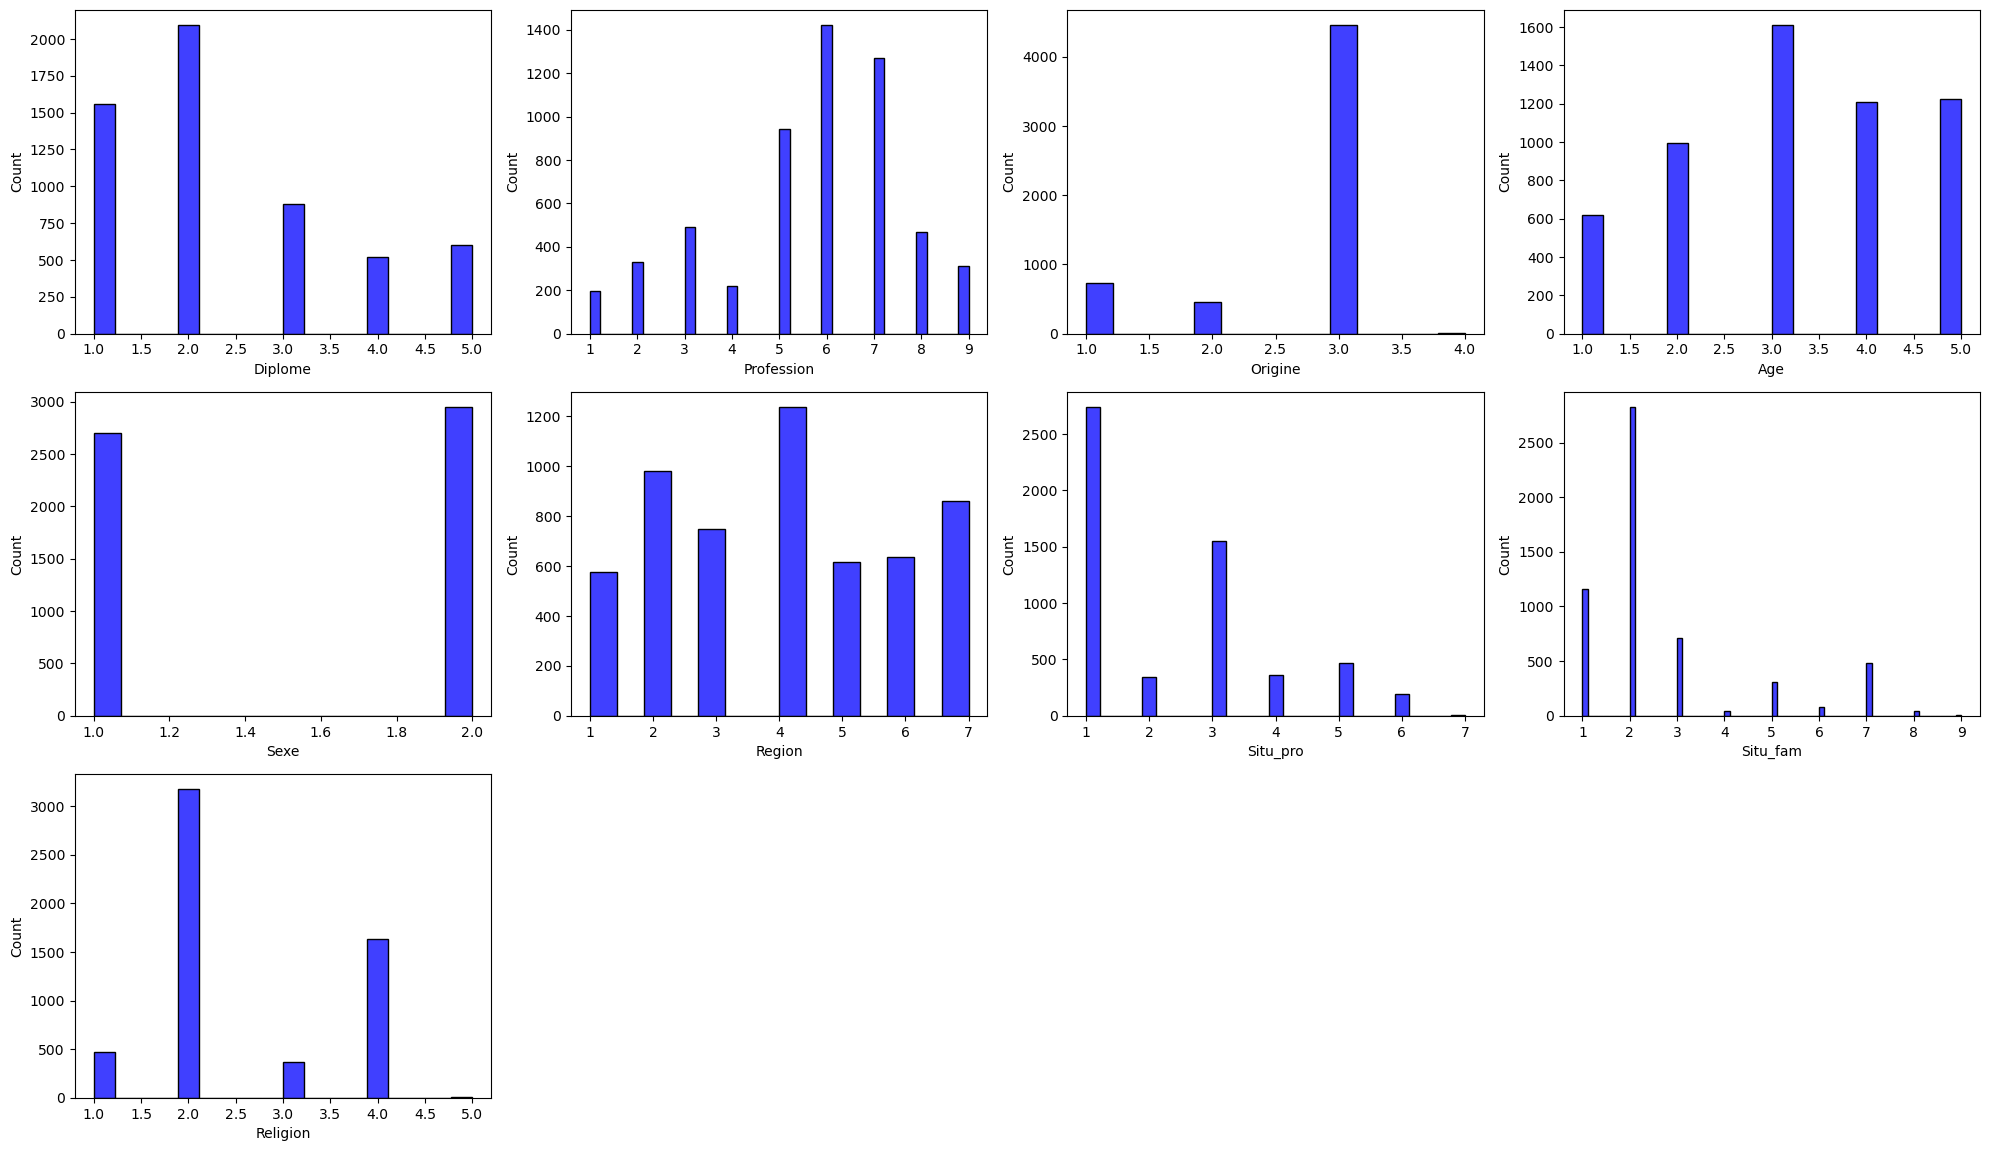

In [15]:
fig = plt.figure(figsize=[20, 15])
var_contexte = df_contexte.drop(columns='Proba_Vote')

for i, col in enumerate(var_contexte, start=1):
    plt.subplot(4, 4, i)
    sns.histplot(df_contexte[col], kde=False, color='blue', edgecolor="k", linewidth=1)

plt.tight_layout()
plt.show()

On remarque une répartition relativement équilibrée entre les femmes et les hommes qui ont participé au baromètre. Les régions de France ainsi que les différentes tranches d'âge sont également bien représentées, bien que l'on observe une légère sur-représentation des actifs (35-49 ans).

Il est également observable qu'une proportion importante de répondants ont un niveau d'éducation faible ou aucun diplôme, et que les catégories socioprofessionnelles d'employés et d'ouvriers constituent une part importante des répondants.

La majorité des répondants sont en situation d'emploi et un nombre significatif sont mariés.

Nous constatons également un pic marqué de répondants sans ascendance étrangère et un autre pic élevé de répondants se déclarant catholiques non pratiquants. Cette dernière observation peut être expliquée par le passé historique chrétien de la France, bien que la pratique religieuse ait décliné ces dernières années.


Pour finir cette analyse exploratoire, nous nous intéressons aux corrélations existantes entre les variables de contexte.

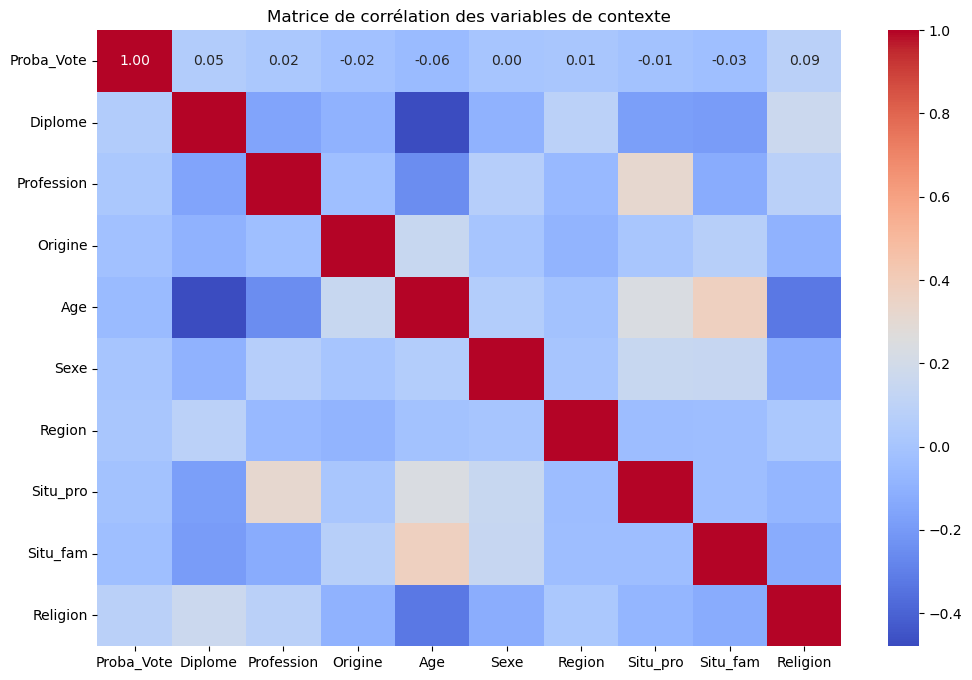

In [16]:
correlation_contexte= df_contexte.corr(method= 'spearman')
plt.figure(figsize=(12,8))
sns.heatmap(correlation_contexte,annot=True, cmap='coolwarm',fmt='.2f')
plt.title('Matrice de corrélation des variables de contexte')
plt.show()

On note qu'il n'existe pas de corrélation significative entre la plupart de nos variables contextuelles.
Cependant, la variable `Âge` présente une corrélation négative  avec la variable `Diplôme` (-0.42) et la variable `Religion` (-0.32). Ce qui signifie qu'à mesure que l'âge augmente, le niveau de diplôme a tendance à diminuer, et vice versa. Logique car plus on remonte dans le temps, moins l'accès aux études supérieurs était développé et accessible.

De plus, les personnes plus âgées ont plus de chances d'être affiliées à la religion catholique, et d'être pratiquant. Enfin la variable `Âge` présente une corrélation positive avec `Situation_familiale` (0.42).

Enfin, la variable  `Diplôme` présente plusieurs corrélations positives, avec `Religion` et `Région`, et des corrélatons négatives avec la profession, et les situations professionnelles et familiales.

### B. Sélection de variables

* Ensemble d'entraînement et de test

On découpe notre jeu de données en deux ensembles : un ensemble d'entraînement et un ensemble de test. Le premier contiendra 70% de nos données contre 30% pour le second.

In [17]:
def preparation(df):
  X=df.drop('Proba_Vote', axis=1)
  y=df['Proba_Vote']

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)
  return(X,y,X_train, X_test, y_train, y_test)

X1,y1,X1_train,X1_test,y1_train,y1_test=preparation(df_contexte)

* Modélisation et sélection


Afin de sélectionner les meilleures variables explicatives possibles pour notre modèle de probabilité de vote, nous disposons de plusieurs méthodes : la minimisation des critères de régression logistique et du Group Lasso.



  - 1ère méthode : **Minimisation de l'AIC et du BIC de la régression logistique**

Premièrement, nous allons tester l'ensemble des combinaisons de variables de contexte possibles dans une régression logistique. Puis nous choisirons la combinaison de variables qui minimise au mieux nos critères AIC et BIC, utilisés comme outils de sélection de modèles statistiques.

Pour rappel, le critère AIC est une mesure de la qualité d'un modèle statistique, prenant en compte à la fois l'ajustement du modèle aux données et de la complexité du modèle, favorisant ainsi les modèles qui offrent un bon équilibre entre ajustement et simplicité. Le critère BIC est similaire à l'AIC mais va pénaliser plus sévèrement les modèles avec un grand nombre de paramètres, favorisant ainsi la parcimonie.

In [18]:
results = []

# Combinaisons possibles
for r in range(1, len(var_contexte) + 1):
    for subset in combinations(var_contexte, r):
        # Créer un sous-ensemble de données avec la combinaison actuelle
        X1_train_subset = X1_train[list(subset)]
        X1_test_subset = X1_test[list(subset)]

        # Modélisation
        X1_train_constante=sm.add_constant(X1_train_subset)
        model=sm.Logit(y1_train,X1_train_constante)
        resultat=model.fit()

        # Calcul de l'AIC/BIC
        results.append((resultat.aic,resultat.bic,subset))

df_aic_bic = pd.DataFrame(results,columns=["AIC","BIC","Variables"])

Optimization terminated successfully.
         Current function value: 0.380728
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.381391
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.381597
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.380325
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.381938
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.381488
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.381964
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.381291
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.377309
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.379792
  

On affiche les 15 premières meilleures combinaisons de variables explicatives :

In [19]:
df_aic_bic.sort_values(["BIC","AIC"]).head(15)

,AIC,BIC,Variables
8,2988.516471,3001.081943,"(Religion,)"
16,2985.499204,3004.347412,"(Diplome, Religion)"
41,2986.803653,3005.651860,"(Region, Religion)"
34,2987.170716,3006.018923,"(Age, Religion)"
23,2987.860843,3006.709051,"(Profession, Religion)"
44,2988.130483,3006.978691,"(Situ_fam, Religion)"
29,2988.715366,3007.563574,"(Origine, Religion)"
38,2988.852240,3007.700447,"(Sexe, Religion)"
51,2983.067505,3008.198449,"(Diplome, Profession, Religion)"
43,2990.501585,3009.349792,"(Situ_pro, Religion)"


Nous observons que la meilleure combinaison de variables explicatives, minimisant à la fois le BIC et l'AIC, est la variable `Religion` seule. La deuxième meilleure combinaison est `Diplôme` et `Religion`, qui semble être préférable dans notre contexte pour conserver davantage d'informations.


  * 2ème méthode : **le Group Lasso**

Nous décidons de vérifier et de confirmer les résultats précédemment obtenus avec la minimisation des critères AIC et BIC sur nos régressions logistiques, grâce au Group Lasso

Le Group Lasso est une extension de la régression Lasso qui permet de sélectionner des groupes entiers de variables plutôt que des variables individuelles. C'est une méthode de régularisation qui pénalise les groupes de coefficients de manière équivalente, ce qui s'avère particulièrement utile lorsque les variables sont naturellement regroupées en ensembles cohérents.

Étant donné que nos variables sont encodées en label, nous avons décidé de les tranformer en one hot encoding et d'appliquer le Group Lasso à chaque groupe de variables représentant les différentes modalités des variables.


In [20]:
encoder = OneHotEncoder()
X_train_encod = encoder.fit_transform(X1_train)

Nous conservons toutes les variables encodées en one-hot lors de l'utilisation du group lasso, principalement pour deux raisons essentielles. Tout d'abord, les modèles de régularisation, tels que le group lasso, sont conçus pour gérer les singularités et sont robustes aux problèmes de multicollinéarité. Contrairement à une régression linéaire où il est possible de supprimer la première modalité d'une variable catégorielle pour éviter la colinéarité, cela ne fonctionne pas de manière équivalente avec la régularisation. En effet, dans un modèle de régularisation, supprimer une modalité entraînerait des résultats "arbitraires" et des différences dans les coefficients, ce qui compromettrait l'interprétation des relations entre les variables catégorielles et la variable cible.

De plus, maintenir toutes les variables encodées en one-hot préserve l'interprétabilité des coefficients dans le modèle. Cela permet de capturer les relations complexes entre les variables catégorielles et la variable cible, sans introduire de biais dans la sélection des modalités de référence. En résumé, la conservation de toutes les modalités des variables one-hot encodées garantit que le modèle de régularisation capture de manière exhaustive les informations contenues dans les données, tout en maintenant la stabilité des résultats et leur interprétabilité.

In [27]:
# nombre de modalités pour chaque variable de contexte
groups = X1_train.nunique().tolist()

# Validation croisée pour sélectionner le meilleur paramètre alpha
group_lasso = GroupLassoCV(groups=groups, prune=False, eps=0.0001, n_alphas=100, max_iter = 200, cv=4)
group_lasso.fit(X_train_encod, y1_train)

print("Le meilleur paramètre de régularisation α estimé est %s" % group_lasso.alpha_)

Le meilleur paramètre de régularisation α estimé est 0.0050554443740925895


In [28]:
# Mise en place du Group Lasso avec le meilleur α
clf = GroupLasso(groups=groups,alpha=group_lasso.alpha_)
clf.fit(X_train_encod,y1_train)

print(clf.coef_) # coefficients des variables de contexte
print(clf.intercept_) # coefficient associé à la constante

[-0.00079047 -0.00383811  0.00092408  0.00194378  0.00176072 -0.
 -0.         -0.          0.          0.         -0.          0.
  0.         -0.          0.         -0.         -0.          0.
 -0.          0.          0.         -0.         -0.         -0.
  0.         -0.         -0.         -0.         -0.          0.
  0.          0.          0.00449482  0.00263225 -0.01887459 -0.00130403
  0.00951602  0.00379286 -0.00025734  0.         -0.         -0.
 -0.         -0.         -0.          0.         -0.         -0.
 -0.01725587 -0.01733453  0.00751917  0.02505989  0.00201134]
0.13427047040708406


Nous observons que le Group Lasso a fortement pénalisé un grand nombre de variables en les réduisant à zéro, tandis qu'il a conservé les variables `Diplôme`, `Situation familiale` et `Religion`.


Nous remarquons que les variables `Diplôme` et `Religion` sont toutes deux sélectionnées par les deux méthodes que nous avons mises en place. Par conséquent, ce sont ces deux variables que nous conserverons pour notre modèle.

In [29]:
true_contexte = X1[["Diplome","Religion"]]

## 1.2 - Modèle sur les variables d'opinion

Désormais, nous souhaitons déterminer le meilleur modèle contenant uniquement des variables explicatives parmi les variables d'opinion disponibles. Pour rappel, voici la liste des variables de contexte ainsi que leurs différentes modalités :

- (a) **Opinion sur les immigrés** (Q17E) (trop d'immigrés ?)
  - 1=Tout à fait d'accord - 2=Plutôt d'accord - 3=Plutôt pas d'accord - 4=Pas du tout d'accord - 5=Nsp
- (b) **Problèmes en France** (Q12A et Q12B)
  - **Premier problème en France** (Q12A) : 1=Emploi - 2=Sécurité des biens et personnes - 3=Education et la recherche - 4=Inégalités - 5=Logement - 6=Impôts et taxes - 7=Hausse des prix - 8=Immigration - 9=Environnement - 10=Déficits publics et la dette de l’Etat - 11=Banlieues - 12=Aucun - 13=Nsp - 99=Non concerné
  - **Second problème en France** (Q12B) : Mêmes modalités que précédemment
- (c) **Niveau de Chômage** (Q14)
  - 1=Beaucoup augmenté ces derniers mois - 2=Un peu augmenté - 3=Resté stable - 4=Un peu diminué  - 5=Beaucoup diminué - 6=Nsp
- (d) **Niveau de délinquance** (Q15)
  - 1=Beaucoup augmenté ces derniers mois - 2=Un peu augmenté - 3=Resté stable - 4=Un peu diminué  - 5=Beaucoup diminué - 6=Nsp
- (e) **Homosexualité, acceptable ?** (Q17B)
  - 1=Tout à fait d'accord - 2=Plutôt d'accord - 3=Plutôt pas d'accord - 4=Pas du tout d'accord - 5=Nsp
- (f) **France en déclin ou en progrès** (Q18)
  - 1=En progrès - 2=En déclin - 3=Ni l'un ni l'autre - 4=Nsp
- (g) **TV** (Q37 et Q38)
  - **Nombre jours où TV est regardée par semaine** (Q37): 0=0 jour - 1=1 jour - 2=2 jours - 3=3 jours - 4=4 jours - 5=5 jours - 6=6 jours - 7=7 jours - 88=Non réponse
  - **Journal regardé** (Q38): 1=20h TF1 - 2=13h TF1 - 3=20h France 2 - 4=13h France 2 - 5=19-20 France 3 - 6=Soir 3 France 3 - 7=12-14 France 3 - 8=Canal + - 9=Arte Info - 10=6 minutes M6 - 11=12h50 M6 - 12=LCI 147 - 13=I-télé - 14=Autre - 15=Aucun - 16=Nsp - 99=Non concerné
- (h) **Opinion sur la mondialisation** (Q44)
  - La mondialisation pour la France est : 1=Une chance - 2= Un danger - 3=Ni l'un, ni l'autre - 4=Nsp
- (i) **Rétablir la Peine de mort** (Q17D)
  - 1=Tout à fait d'accord - 2=Plutôt d'accord - 3=Plutôt pas d'accord - 4=Pas du tout d'accord - 5=Nsp

On crée le dataframe contenant les variables d'opinion :

In [30]:
df_opinion=df[['Proba_Vote','Q17E','Q12A','Q12B','Q14','Q15','Q17B','Q18','Q37','Q38','Q44','Q17D']]
df_opinion = df_opinion.rename(columns={'Q17E': 'Immigration','Q12A':'Pb_1','Q12B':'Pb_2','Q14':'Chomage','Q15':'Delinquance','Q17B':'Homosexualité','Q18':'Progrès','Q37':'TV_Freq','Q38':'TV_Journal','Q44':'Mondialisation','Q17D':'Peine_mort'})

df_opinion

,Proba_Vote,Immigration,Pb_1,Pb_2,Chomage,Delinquance,Homosexualité,Progrès,TV_Freq,TV_Journal,Mondialisation,Peine_mort
0,0,3.0,1.0,2.0,3.0,2.0,2.0,2.0,5.0,1.0,2.0,4.0
1,0,2.0,2.0,9.0,2.0,2.0,3.0,2.0,7.0,6.0,2.0,3.0
2,0,4.0,6.0,7.0,1.0,3.0,1.0,2.0,7.0,3.0,2.0,4.0
3,0,2.0,10.0,3.0,4.0,3.0,2.0,2.0,7.0,2.0,3.0,2.0
4,0,3.0,10.0,11.0,2.0,3.0,2.0,3.0,5.0,2.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5645,0,2.0,6.0,8.0,1.0,1.0,4.0,2.0,7.0,1.0,2.0,1.0
5646,0,1.0,10.0,8.0,2.0,3.0,1.0,3.0,3.0,6.0,2.0,2.0
5647,0,2.0,1.0,7.0,3.0,3.0,2.0,2.0,5.0,2.0,2.0,4.0
5648,0,4.0,7.0,4.0,3.0,3.0,2.0,2.0,3.0,3.0,3.0,4.0


### A. Analyse exploratoire

Nous analysons rapidement le dataframe des variables d'opinion :

In [31]:
print(f'Le dataset est composé de {df_opinion.shape[0]} observations et {df_opinion.shape[1]} colonnes.')

Le dataset est composé de 5650 observations et 12 colonnes.


In [32]:
print(f'Vérifions le pourcentage de valeurs manquantes de chaque variable : \n{((df_opinion.isna().sum())/5650)*100}')

Vérifions le pourcentage de valeurs manquantes de chaque variable : 
Proba_Vote        0.000000
Immigration       0.000000
Pb_1              0.000000
Pb_2              0.106195
Chomage           0.000000
Delinquance       0.000000
Homosexualité     0.000000
Progrès           0.000000
TV_Freq           0.141593
TV_Journal        3.592920
Mondialisation    0.000000
Peine_mort        0.000000
dtype: float64


On remarque la présence de valeurs manquantes pour les variables `TV_Freq` et `TV_Journal`, résultant du manque de réponse des répondants.  On décide de les remplacer par la valeur de la modalité "non renseignée" correspondante à chaque variable.

In [33]:
df_opinion['Pb_2'] = df_opinion['Pb_2'].fillna(13.0)
df_opinion['TV_Freq'] = df_opinion['TV_Freq'].fillna(8.0)
df_opinion['TV_Journal'] = df_opinion['TV_Journal'].fillna(16.0)

In [34]:
((df_opinion.isna().sum())/5650)*100

Proba_Vote        0.0
Immigration       0.0
Pb_1              0.0
Pb_2              0.0
Chomage           0.0
Delinquance       0.0
Homosexualité     0.0
Progrès           0.0
TV_Freq           0.0
TV_Journal        0.0
Mondialisation    0.0
Peine_mort        0.0
dtype: float64

Le dataset ne comporte plus de valeurs manquantes.

In [35]:
print(f'On s\'intéresse également au nombre de valeurs uniques par variables : \n{df_opinion.nunique()}' )

On s'intéresse également au nombre de valeurs uniques par variables : 
Proba_Vote         2
Immigration        5
Pb_1              12
Pb_2              13
Chomage            6
Delinquance        6
Homosexualité      5
Progrès            4
TV_Freq            9
TV_Journal        16
Mondialisation     4
Peine_mort         5
dtype: int64


Puis aux doublons purs que nous gardons :

In [36]:
print(f'Dans le dataset, il existe au total {df_opinion.duplicated().sum()} doublons purs. On les garde.')

Dans le dataset, il existe au total 26 doublons purs. On les garde.


De plus, nous nous intéressons aux distributions des variables d'opinion :

/Users/elodie/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/elodie/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/elodie/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/elodie/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

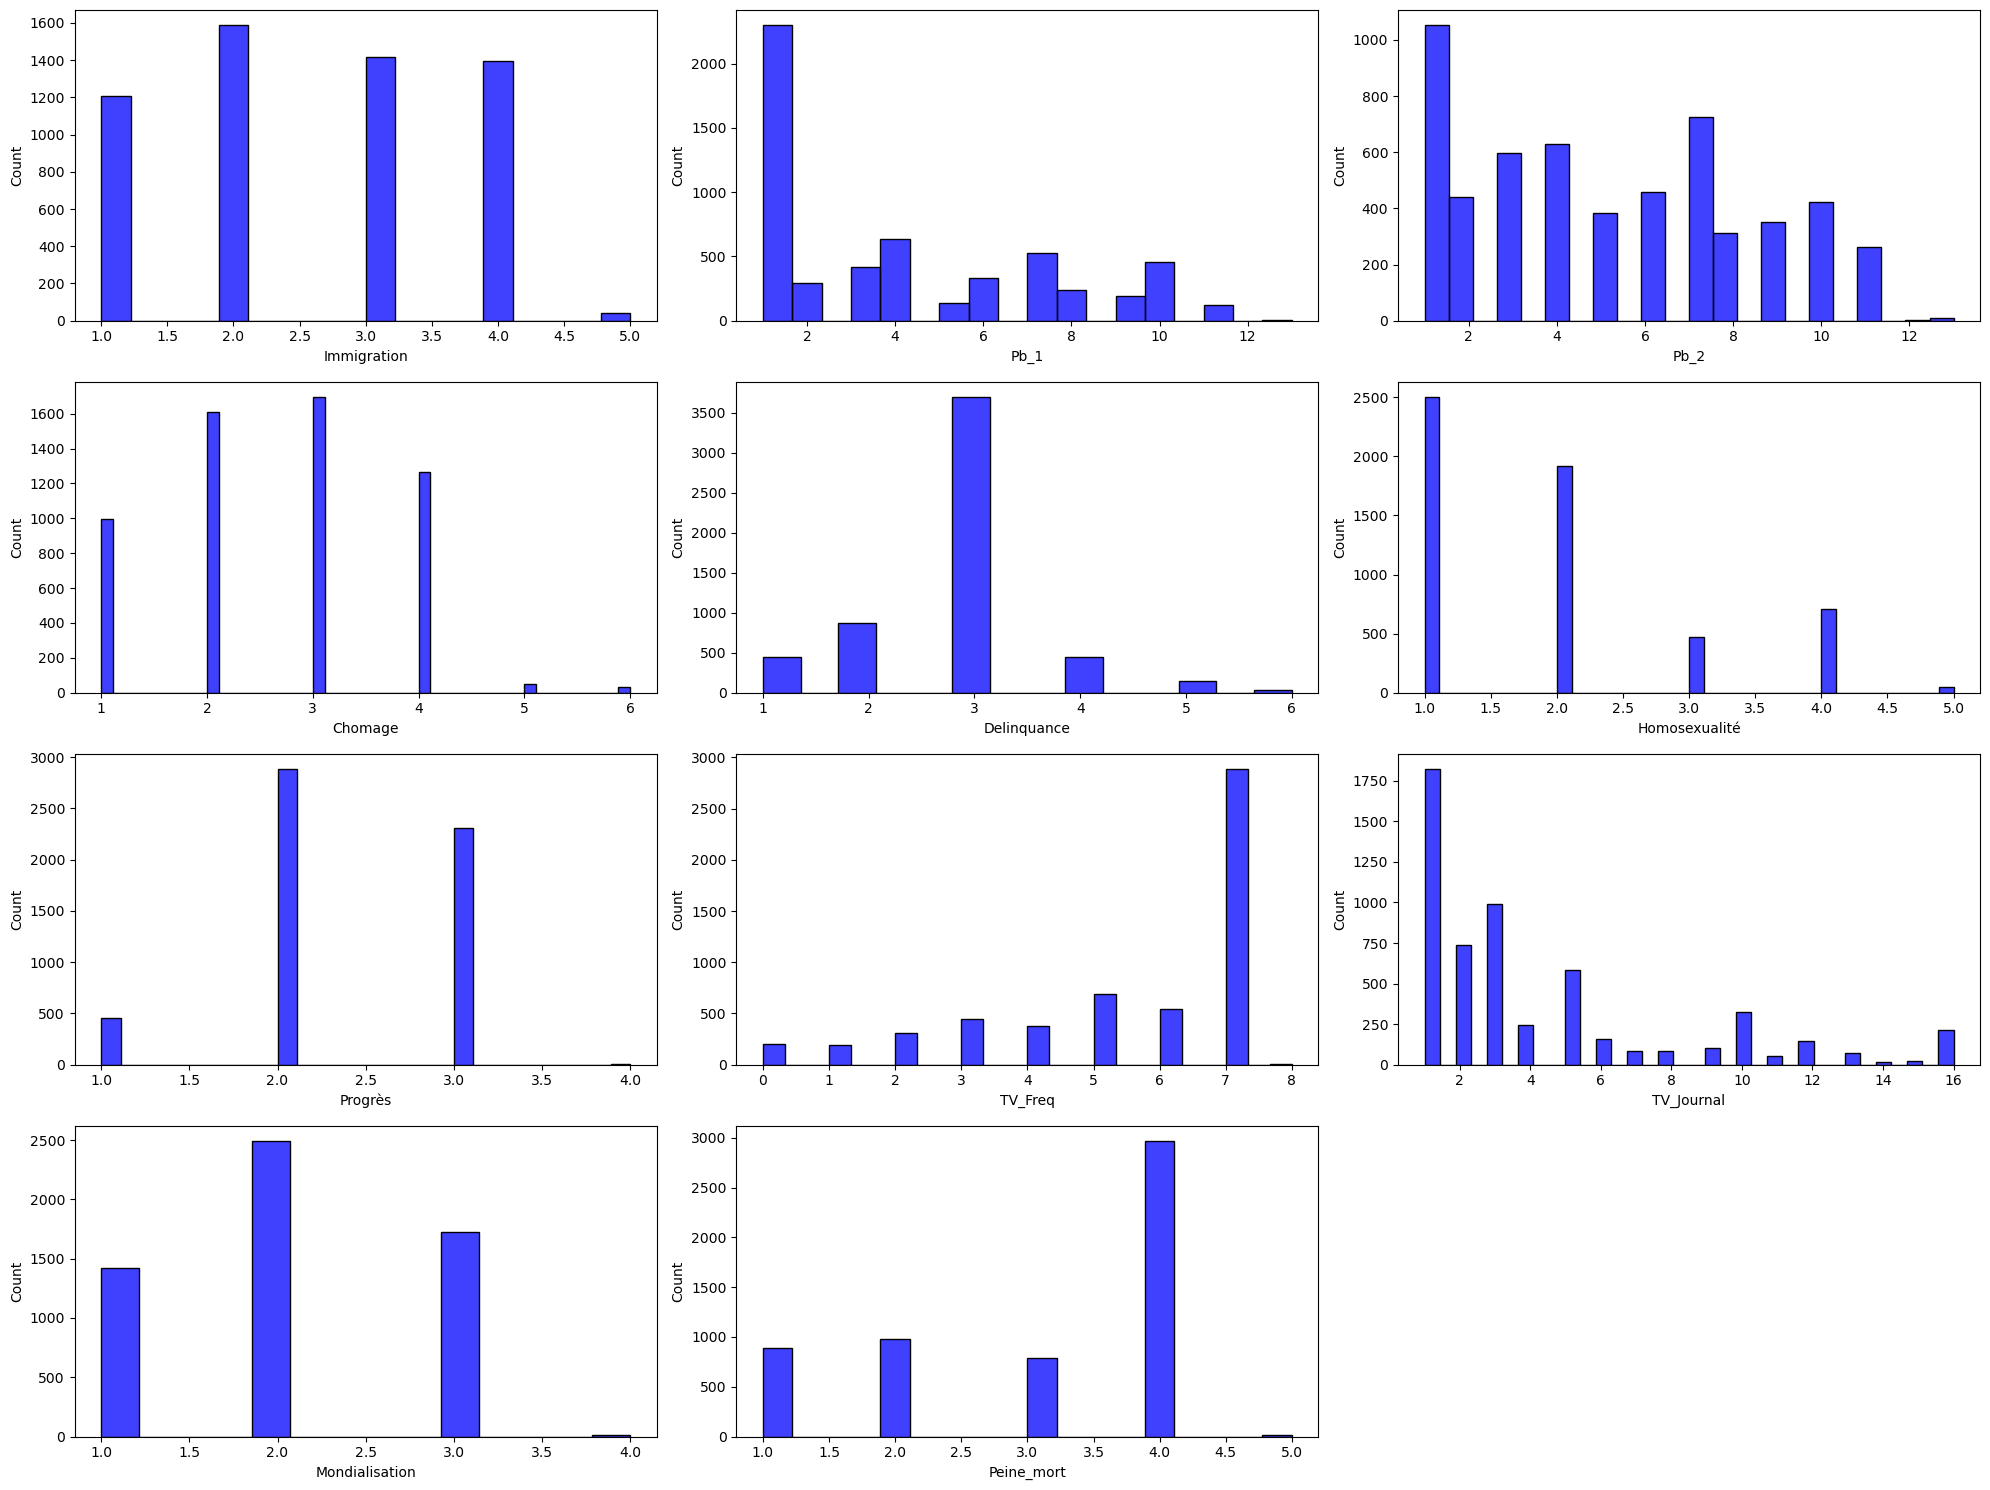

In [37]:
fig = plt.figure(figsize=[20, 15])
var_opinion = df_opinion.drop(columns='Proba_Vote')

for i, col in enumerate(var_opinion, start=1):
    plt.subplot(4, 3, i)
    sns.histplot(df_opinion[col], kde=False, color='blue', edgecolor="k", linewidth=1)

plt.tight_layout()
plt.show()

Nous pouvons étudier la distribution de chaque variable d'opinion afin de déterminer si certaines opinions sont largement partagées parmi les Français ou si, au contraire, elles suscitent des divisions.

Nous observons une diversité d'opinions concernant le niveau d'immigration et le taux de chômage en France. En revanche, nous constatons un consensus marqué sur la question de l'emploi, qui émerge comme le premier problème de société en France selon les répondants.

Nous remarquons également un pic très élevé de répondants déclarant regarder la télévision tous les jours de la semaine, ainsi qu'un fort intérêt pour le journal télévisé de 20h sur TF1. Enfin, un nombre important de répondants exprime une forte opposition au rétablissement de la peine de mort.








Pour finir, nous nous intéressons aux corrélations existantes entre nos variables d'opinion :

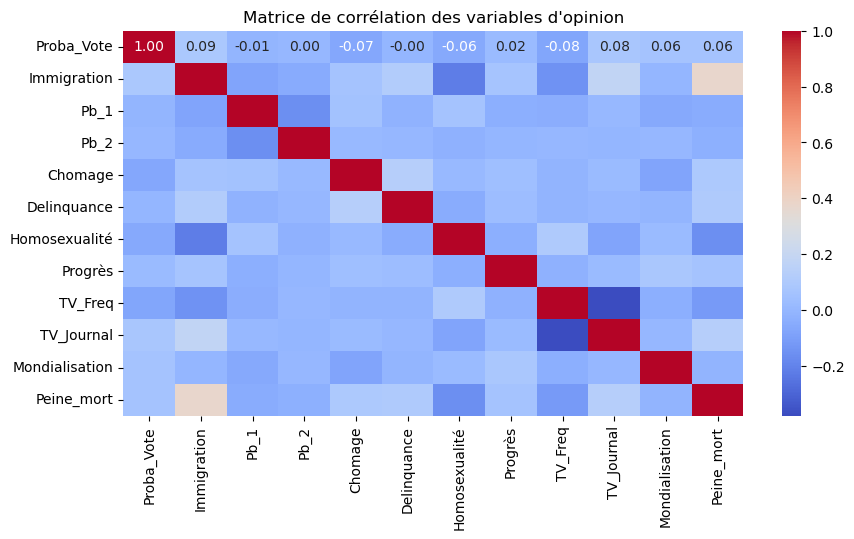

In [38]:
correlation_opinion= df_opinion.corr(method= 'pearson')
plt.figure(figsize=(10,5))
sns.heatmap(correlation_opinion,annot=True, cmap='coolwarm',fmt='.2f')
plt.title('Matrice de corrélation des variables d\'opinion')
plt.show()

On observe que dans notre matrice de corrélation, qu'il n'existe pas de corrélation significative entre la plupart de nos variables d'opinion.

Néanmoins, la variable `Immigration` présente une corrélation positive modérée avec `Peine_mort` (0.37), indiquant qu'une attitude plus favorable envers l'immigration peut être associée à un soutien plus fort envers la peine de mort. De plus, elle présente des corrélations négatives avec les variables `Homosexualité` (-0.22) et `TV_Freq` (-0.16).

Enfin, la variable `Peine_mort` présente des corrélations modérées avec `Immigration` (0.37) et `Homosexualité` (-0.16), indiquant des associations potentielles entre ces variables dans le contexte d'opinions politiques ou sociales.

### B. Sélection de variables


  - Ensemble d'entraînement et de test

In [39]:
X2,y2,X2_train,X2_test,y2_train,y2_test=preparation(df_opinion)

* Modélisation et sélection

  * 1ère méthode : **Minimisation de l'AIC et du BIC de la régression logistique**

In [40]:
results2 = []

# Combinaisons possibles
for r in range(1, len(var_opinion) + 1):
    for subset in combinations(var_opinion, r):
        # Créer un sous-ensemble de données avec la combinaison actuelle
        X2_train_subset = X2_train[list(subset)]
        X2_test_subset = X2_test[list(subset)]

        # Modélisation
        X2_train_constante=sm.add_constant(X2_train_subset)
        model=sm.Logit(y2_train,X2_train_constante)
        resultat=model.fit()

        # Calculer l'AIC/BIC
        results2.append((resultat.aic,resultat.bic,subset))

df2_aic_bic = pd.DataFrame(results2,columns=["AIC","BIC","Variables"])

Optimization terminated successfully.
         Current function value: 0.378620
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.381948
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.381930
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.380504
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.381957
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.379866
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.381688
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.379156
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.379552
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.380789
  

On regarde les 15 meilleures combinaisons de variables :

In [41]:
df2_aic_bic.sort_values(["BIC","AIC"]).head(15)

,AIC,BIC,Variables
86,2972.428565,2997.559508,"(Immigration, Chomage, TV_Freq)"
302,2966.955950,2998.369630,"(Immigration, Chomage, Homosexualité, TV_Freq)"
311,2967.699566,2999.113246,"(Immigration, Chomage, TV_Freq, Mondialisation)"
721,2961.943240,2999.639655,"(Immigration, Chomage, Homosexualité, TV_Freq,..."
303,2970.149316,3001.562996,"(Immigration, Chomage, Homosexualité, TV_Journal)"
87,2976.527020,3001.657963,"(Immigration, Chomage, TV_Journal)"
310,2970.354291,3001.767970,"(Immigration, Chomage, TV_Freq, TV_Journal)"
723,2964.466561,3002.162976,"(Immigration, Chomage, Homosexualité, TV_Journ..."
720,2964.910997,3002.607413,"(Immigration, Chomage, Homosexualité, TV_Freq,..."
313,2971.194280,3002.607959,"(Immigration, Chomage, TV_Journal, Mondialisat..."


Nous constatons que la combinaison de variables `Immigration`, `Chômage` et `TV_Freq` minimise à la fois l'AIC et le BIC.

Comme précédemment, nous allons également mettre en œuvre le Group Lasso, afin d'observer quelles variables pertinentes cette méthode de pénalisation sélectionne.

* 2ème méthode : **le Group Lasso**


In [42]:
encoder = OneHotEncoder()
X2_train_encod = encoder.fit_transform(X2_train)

In [43]:
# nombre de modalités pour chaque variable de contexte
groups = X2.nunique().tolist()

# Validation croisée pour sélectionner le meilleur paramètre alpha
group_lasso = GroupLassoCV(groups=groups, prune=False, n_alphas=100, max_iter = 200, cv=4)
group_lasso.fit(X2_train_encod, y2_train)

print("Le meilleur paramètre de régularisation α estimé est %s" % group_lasso.alpha_)

Le meilleur paramètre de régularisation α estimé est 0.002401985238213951


In [44]:
# Mise en place du Group Lasso avec le meilleur α
clf = GroupLasso(groups=groups,alpha=group_lasso.alpha_)
clf.fit(X2_train_encod,y2_train)

print(clf.coef_) # coefficients des variables d'opinion
print(clf.intercept_) # coefficient associé à la constante

[-0.00743919 -0.00772185  0.00221134  0.02262613 -0.00967643 -0.00232211
 -0.0178219  -0.01371635  0.02345448 -0.00802109 -0.01279673 -0.00122007
 -0.04327077  0.15155983 -0.04670072 -0.01941396 -0.00973061  0.00150788
 -0.0402265   0.01234969  0.00978404  0.04969517 -0.01071371 -0.01711237
 -0.00671627  0.01598375 -0.01511524  0.00475451  0.00357465 -0.0077656
  0.02341273  0.00117661 -0.00772248 -0.01448801 -0.00109302 -0.00128582
  0.00489009 -0.00489929  0.00815662 -0.00415508 -0.0055156   0.00152326
  0.01196835  0.00177394 -0.00529102 -0.01144159  0.00299032  0.00713578
 -0.01388942  0.0069883  -0.00023465  0.04063988 -0.00306604 -0.02572563
  0.02586498 -0.00883106 -0.00320055 -0.00857517 -0.02194288  0.00483647
 -0.01002386 -0.01232211 -0.00631764  0.00186872  0.00292356 -0.00218955
  0.00296639  0.01191026  0.00742961  0.00778006 -0.00308096 -0.01607903
 -0.00728789 -0.00668078  0.00194721  0.02715602 -0.01347985  0.0045929
  0.00952039 -0.00063345  0.01033829 -0.0121059  -0.0

Nous observons que le Group Lasso, avec un paramètre de contrainte optimal, ne rend nul aucun coefficient. Nous allons donc "forcer" la sparcité de celui-ci en augmentant la valeur de la contrainte jusqu'à avoir 3 ensembles de variables restant.

In [45]:
clf = GroupLasso(groups=groups,alpha=0.0115)
clf.fit(X2_train_encod,y2_train)
print(clf.coef_)
print(clf.intercept_)

[-5.62616693e-03 -6.48951519e-03  8.15934200e-04  1.24425288e-02
 -1.14278086e-03  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  2.85499744e-04
  2.09397211e-05 -9.10383702e-05  2.32004214e-04 -1.28622247e-06
  4.86692387e-05 -3.45977233e-05 -4.70117504e-04  9.92690133e-06
 -0.00000000e+00 -0.00000

Les variables sélectionnées sont donc `Immigration`, `TV_Freq` et `Peine_mort`. Nous allons choisir les variables communes entre les deux méthodes, à savoir `Immigration` et `TV_Freq`, que nous utiliserons pour évaluer la probabilité qu'un individu vote pour la candidate des Verts.

In [46]:
true_opinion = X2[["Immigration","TV_Freq"]]

## 1.3 - Conclusion de la sélection des variables

Les régressions logistiques menées lors de cette partie, en accord avec les Group Lasso réalisés, nous permettent de garder :
- les variables de contexte `Diplôme` et `Religion`.
- les variables d'opinion `Immigration` et `TV_Freq`.



## 1.4 - Réalisation d'une régression logistique avec nos variables pré-sélectionnées

À présent que nous avons l'ensemble de nos variables, nous allons mettre en place une régression logistique afin de modéliser la relation entre ces variables explicatives et notre variable cible. Cette régression logistique nous permettra de prédire la probabilité qu'un individu vote ou non pour D. Voynet, en fonction de ses valeurs des variables explicatives.

In [47]:
# Création du dataframe final contenant toutes les variables
all_var = pd.merge(true_opinion,true_contexte,left_index=True,right_index=True)
df_final=pd.merge(df['Proba_Vote'],all_var,left_index=True,right_index=True)
df_final

,Proba_Vote,Immigration,TV_Freq,Diplome,Religion
0,0,3.0,5.0,2.0,2.0
1,0,2.0,7.0,4.0,4.0
2,0,4.0,7.0,1.0,2.0
3,0,2.0,7.0,1.0,2.0
4,0,3.0,5.0,4.0,2.0
...,...,...,...,...,...
5645,0,2.0,7.0,3.0,2.0
5646,0,1.0,3.0,1.0,2.0
5647,0,2.0,5.0,3.0,4.0
5648,0,4.0,3.0,3.0,4.0


In [48]:
X,y,X_train,X_test,y_train,y_test=preparation(df_final)

Pour effectuer une régression logistique, il est nécessaire de convertir nos variables en variables indicatrices en utilisant l'encodage one-hot, et en supprimant l'une des modalités pour éviter le piège de la multicollinéarité.

In [49]:
ohe = OneHotEncoder(drop="first")
ohe.fit(X_train)

train_encode = ohe.transform(X_train)
test_encode = ohe.transform(X_test)

In [50]:
model = LogisticRegression(penalty=None, fit_intercept=False, max_iter=1000)
model.fit(train_encode, y_train)
pred = model.predict(test_encode)
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)
f1 = f1_score(y_test, pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8678466076696165
Precision: 0.25
Recall: 0.018518518518518517
F1 Score: 0.034482758620689655


À partir des résultats de la régression logistique, nous constatons que le modèle présente une *accuracy* relativement élevée, dépassant les 86%. Cependant, sa précision est de seulement 25%, ce qui suggère que sur toutes les prédictions positives effectuées par le modèle, seules 25% sont correctes. De plus, le rappel et le score F1 du modèle sont très faibles, suggérant que le modèle pourrait avoir des difficultés à généraliser efficacement et à identifier avec précision les cas positifs. Ceci peut être dû à un déséquilibre dans les données, nécessitant une attention particulière pour améliorer les performances du modèle.

En effet, comme observé précédemment, notre variable cible présente un déséquilibre marqué, avec un nombre significativement plus élevé de répondants ne votant pas pour notre candidate par rapport à ceux qui l'envisagent. De même, les variables explicatives présentent des déséquilibres à différentes échelles selon la variable considérée. Afin de remédier à ce problème, nous allons encoder les variables explicatives en variables binaires, en fonction de leurs modalités respectives. Par la suite, afin de corriger le déséquilibre de notre variable cible, nous procéderons au rééchantillonnage de nos données en augmentant le nombre d'échantillons de la classe minoritaire.

In [51]:
df_test=df_final.copy()
df_test['Immigration']=df_test['Immigration'].apply(lambda x: 0 if x < 3 else 1) # 0 si le répondant considère qu'il y a trop d'immigrés en France et 1 sinon
df_test['TV_Freq']=df_test['TV_Freq'].apply(lambda x: 0 if x < 7 else 1) # 1 si le répondant regarde la télévision tous les jours et 0 sinon
df_test['Diplome']=df_test['Diplome'].apply(lambda x: 0 if x < 3 else 1) # 0 si le répondant possède un niveau de diplôme inférieur au baccalauréat et 1 si supérieur
df_test['Religion']=df_test['Religion'].apply(lambda x: 0 if x < 3 else 1) # 0 si la personne est de religion catholique et 1 sinon

In [52]:
# Rééchantillonnage
counts = df_test['Proba_Vote'].value_counts()

classe_majoritaire = counts.idxmax()
classe_minoritaire = counts.idxmin()

echantillon_majoritaire = df_test[df_test['Proba_Vote'] == classe_majoritaire]

echantillon_minoritaire_aug = df_test[df_test['Proba_Vote'] == classe_minoritaire].sample(n=counts[classe_majoritaire], replace=True, random_state=42)

df_oversampled = pd.concat([echantillon_majoritaire, echantillon_minoritaire_aug])

df_oversampled = df_oversampled.sample(frac=1, random_state=42)

Maintenant que nous avons corrigé notre jeu de données, nous réeffectuons une régression logistique :


In [53]:
Xb,yb,Xb_train,Xb_test,yb_train,yb_test=preparation(df_oversampled)

In [54]:
ohe = OneHotEncoder(drop="first")
ohe.fit(Xb_train)

train_encode = ohe.transform(Xb_train)
test_encode = ohe.transform(Xb_test)
model = LogisticRegression(penalty=None, fit_intercept=False, max_iter=1000)
model.fit(train_encode, yb_train)
pred = model.predict(test_encode)
accuracy = accuracy_score(yb_test, pred)
precision = precision_score(yb_test, pred)
recall = recall_score(yb_test, pred)
f1 = f1_score(yb_test, pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.579445571331981
Precision: 0.58222533240028
Recall: 0.5625422582826234
F1 Score: 0.5722145804676754


Nous observons une amélioration significative de nos résultats. Bien que l'*accuracy* ait diminué, toutes les autres métriques ont considérablement augmenté, témoignant ainsi d'une amélioration notable de notre modèle dans sa capacité à prédire l'intention de vote d'un répondant en fonction de ses caractéristiques et opinions.

Nous allons dans la deuxième partie de cette analyse construire un réseau bayésien comportant les variables sélectionnées en prenant en compte les interactions entre les variables de contexte et d'opinion mais aussi leurs interactions avec la variable de probabilité de vote.

# Partie 2 - Réseau bayésien

Un réseau bayésien est un modèle graphique probabiliste représentant les dépendances conditionnelles entre un ensemble de variables aléatoires. On utilise un graphe acyclique orienté pour représenter les dépendances, graphe dans lequel les noeuds représentent les variables aléatoires et les arêtes, les relations de dépendance probabiliste entre ces variables.


On veut donc dans notre cas, un réseau bayésien qui modélise les relations de dépendance entre les variables de contexte, les variables d'opinion et la probabilité de voter pour Voynet, tout en tenant compte du sens des causalités et des relations causales impossibles entre les variables.

### A. Relations probabilistes

Afin de contruire notre réseau bayésien, nous devons d'abord définir les relations probabilistes entre les variables en identifiant les dépendances conditionnelles entre elles, ce grâce à une analyse exploratoire, des tests statistiques ou bien à l'aide de nos connaissances.

- **À l'aide de nos connaissances**

Pour commencer, voici nos hypothèses initiales de relations entre nos variables :

Toutes les variables de contexte et d'opinion semblent influer sur la probabilité de vote. En effet :
  - Les personnes ayant un niveau de diplôme plus élevé pourraient avoir des opinions politiques différentes de celles ayant un niveau de diplôme plus faible, ce qui pourrait influencer leur probabilité de vote.
  - Les personnes appartenant à des religions différentes ou ayant des pratiques religieuses différentes pourraient avoir des préférences politiques différentes, ce qui pourrait influencer leur probabilité de vote. A noter que les modalités de la question sont essentiellement centrées autour du catholicisme, c'est à prendre en compte dans de potentielles interprétations.
  - Les opinions sur l'immigration influencent la probabilité de vote.
  - Les personnes qui regardent plus souvent la télévision peuvent être exposées à plus de publicités politiques ou à une couverture médiatique plus importante des élections, ce qui pourrait influencer leur probabilité de vote.


De plus, nous pouvons envisager d'autres relations potentielles entre les variables de contexte et les opinions, notamment :

- `Diplôme/Religion` → `Immigration`
- `Diplôme/Religion` → `TV_Freq`
- `Fréquence TV` → `Immigration`


Enfin, les variables d'opinion, ou la probabilité de vote ne peuvent pas influencer les variables de contexte.



- **Analyse des corrélations**

Par la suite, nous pouvons examiner les corrélations entre nos variables de contexte, d'opinion et notre variable cible. Cette démarche vise à déterminer si certaines variables présentent des corrélations significatives et émergent ainsi comme des relations fortes à considérer dans notre réseau bayésien.

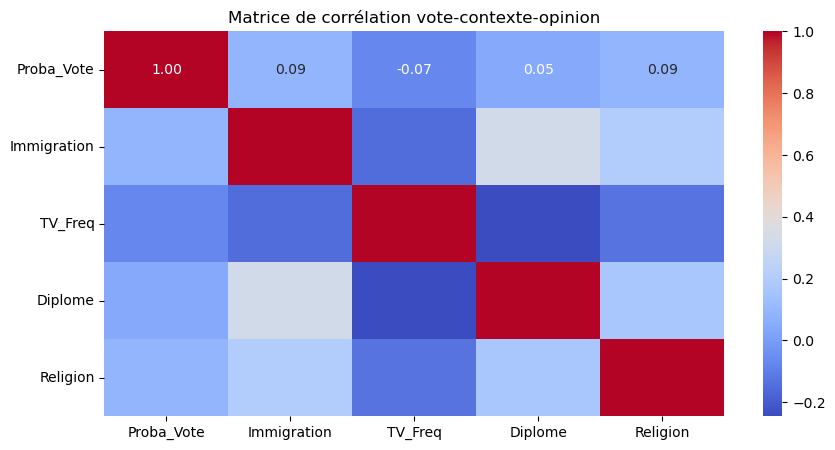

In [55]:
correlation_fin= df_final.corr(method= 'spearman')
plt.figure(figsize=(10,5))
sns.heatmap(correlation_fin,annot=True, cmap='coolwarm',fmt='.2f')
plt.title('Matrice de corrélation vote-contexte-opinion')
plt.show()

Bien que nous ne constations pas de corrélation forte, il est tout de même important de noter des corrélations significatives entre certaines variables. Par exemple, nous observons une corrélation relativement importante entre le niveau d'éducation (`Diplôme`) et l'opinion sur l'immigration (0.32), ainsi qu'entre le niveau d'éducation et la fréquence de visionnage de la télévision (-0.25). De plus, une autre corrélation positive se distingue entre l'opinion sur l'immigration et l'appartenance religieuse (0.20).

Il serait alors intéressant de considérer ces corrélations lors de la définition des rélations entre nos variables, en gardant à l'esprit que ce sont les variables de contexte qui exercent une influence sur les variables d'opinion, et non l'inverse.

- **Test d'indépendance du Chi-deux**

De plus, nous pouvons tenter d'utiliser des tests statistiques afin d'évaluer l'indépendance entre nos variables. Pour ce faire, nous pouvons utiliser le test du Chi-deux, qui nous permet de tester l'indépendance entre les variables deux par deux. L'hypothèse nulle de ce test indique l'absence de relation significative entre les variables examinées, et donc d'une indépendance entre les variables. Si l'hypothèse nulle est rejetée, alors on peut conclure qu'il existe une relation significative entre les variables.

In [56]:
chi2_results = {}
for i in range(5) :
  for y in range(i+1,5) :
    contingency_table = pd.crosstab(df_final[df_final.columns[i]], df_final[df_final.columns[y]])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi2_results[(df_final.columns[i], df_final.columns[y])] = {'chi2': chi2, 'p-value': p}

for pair, result in chi2_results.items():
    print(f"Variables: {pair}, p-value: {round(result['p-value'],4)}")
    #print(f"Variables: {pair}, Chi-squared: {result['chi2']}, p-value: {result['p-value']}")

Variables: ('Proba_Vote', 'Immigration'), p-value: 0.0
Variables: ('Proba_Vote', 'TV_Freq'), p-value: 0.0
Variables: ('Proba_Vote', 'Diplome'), p-value: 0.0013
Variables: ('Proba_Vote', 'Religion'), p-value: 0.0
Variables: ('Immigration', 'TV_Freq'), p-value: 0.0
Variables: ('Immigration', 'Diplome'), p-value: 0.0
Variables: ('Immigration', 'Religion'), p-value: 0.0
Variables: ('TV_Freq', 'Diplome'), p-value: 0.0
Variables: ('TV_Freq', 'Religion'), p-value: 0.0
Variables: ('Diplome', 'Religion'), p-value: 0.0


La p valeur obtenue pour chaque test représente la probabilité d'observer une statistique de test aussi extrême que celle observée si l'hypothèse nulle est vraie. Une p valeur faible indique une forte probabilité que les variables soient significativement liées, permettant ainsi le rejet de l'hypothèse nulle.

En fixant le niveau de signification de 5%, nous constatons que tous les tests entre nos variables rejettent l'hypothèse nulle, suggérant ainsi une association significative entre ces variables. Nous pouvons donc conclure à une dépendance importante entre chacune des variables.

Cette conclusion est cohérente, notamment en ce qui concerne la variable de probabilité de vote, car les autres variables ont été sélectionnées en raison de leur lien avec celle-ci. Cependant, en ce qui concerne les autres relations, ces résultats ne nous aident pas à choisir les relations à inclure dans notre réseau.


- **Test d'indépendance conditionnel**

Enfin, nous pouvons appliquer un test du Chi-deux conditionnel pour évaluer l'indépendance entre la variable cible `Proba_Vote` et une variable explicative, tout en prenant en compte d'autres variables dans le réseau. Cette approche permet de déterminer si ces variables sont conditionnellement indépendantes les unes des autres ou s'il existe une association significative entre la probabilité de vote et la variable considérée même après avoir contrôlé les effets des autres variables du réseau.

Si les variables sont conditionnellement indépendantes, cela signifie qu'elles n'influencent pas directement les autres variables lorsque les autres variables sont prises en compte. Dans un réseau bayésien, il est généralement préférable de ne pas inclure de lien entre des variables conditionnellement indépendantes, car cela pourrait rendre le modèle plus complexe sans améliorer sa capacité prédictive.

Nous allons réaliser plusieurs tests d'indépendance conditionnelle pour chacune des variables explicatives, en tenant compte de toutes les combinaisons des autres variables.

Commençons par le test d'indépendance conditionnelle entre la probabilité de vote et la fréquence de visionnage de la télévision :

In [57]:
print(chi_square(X='TV_Freq', Y='Proba_Vote', Z=["Religion"], data=df_final, significance_level=0.05))
print(chi_square(X='TV_Freq', Y='Proba_Vote', Z=["Diplome"], data=df_final, significance_level=0.05))
print(chi_square(X='TV_Freq', Y='Proba_Vote', Z=["Immigration"], data=df_final, significance_level=0.05))
print(chi_square(X='TV_Freq', Y='Proba_Vote', Z=["Diplome","Immigration"], data=df_final, significance_level=0.05))
print(chi_square(X='TV_Freq', Y='Proba_Vote', Z=["Religion","Immigration"], data=df_final, significance_level=0.05))
print(chi_square(X='TV_Freq', Y='Proba_Vote', Z=["Religion","Diplome"], data=df_final, significance_level=0.05))
print(chi_square(X='TV_Freq', Y='Proba_Vote', Z=["Religion","Diplome","Immigration"], data=df_final, significance_level=0.05))

False
False
False
False
False
False
False


Nous constatons que l'ensemble des tests rejettent l'hypothèse nulle d'indépendance entre les variables, ce qui suggère une dépendance significative entre elles, même en tenant compte des valeurs de `Dipôme`, `Immigration` et `Religion`.

Examinons à présent les résultats des tests du Chi-deux conditionnel entre la probabilité de vote et l'opinion sur le niveau d'immigration en France.

In [58]:
print(chi_square(X='Immigration', Y='Proba_Vote', Z=["Religion"], data=df_final, significance_level=0.05))
print(chi_square(X='Immigration', Y='Proba_Vote', Z=["TV_Freq"], data=df_final, significance_level=0.05))
print(chi_square(X='Immigration', Y='Proba_Vote', Z=["Diplome"], data=df_final, significance_level=0.05))
print(chi_square(X='Immigration', Y='Proba_Vote', Z=["Diplome","TV_Freq"], data=df_final, significance_level=0.05))
print(chi_square(X='Immigration', Y='Proba_Vote', Z=["Religion","TV_Freq"], data=df_final, significance_level=0.05))
print(chi_square(X='Immigration', Y='Proba_Vote', Z=["Religion","Diplome"], data=df_final, significance_level=0.05))
print(chi_square(X='Immigration', Y='Proba_Vote', Z=["Religion","Diplome","TV_Freq"], data=df_final, significance_level=0.05))

False
False
False
True
False
True
True


Il semble y avoir une indépendance entre `Proba_Vote` et `Immigration` lorsque nous considérons simultanément les valeurs des variables `Diplôme` et `TV_Freq`. De même, cette indépendance est également observée lorsque nous considérons simultanément les valeurs des variables `Diplôme` et `Religion`, ainsi que lorsque nous considérons simultanément les valeurs des variables `Religion`, `Diplôme`, et `TV_Freq`. Ces résultats suggèrent donc l'absence d'association entre la variable `Immigration` et la probabilité de vote, lorsque nous tenons compte des autres variables `Religion`, `Diplôme`, et `TV_Freq`.

Pour intégrer ce résultat dans la construction de notre réseau bayésien, nous pouvons établir une dépendance entre l'immigration et la probabilité de vote, à condition de considérer l'impact de la religion et de la fréquence de visionnage de la télévision sur l'immigration. En effet, le test d'indépendance, prenant en compte les valeurs de ces deux variables, rejette l'hypothèse d'indépendance entre la probabilité de vote et l'immigration.

En conclusion, nous pouvons retenir ces relations, qui respectent l'ensemble des dépendances conditionnelles :

- `Religion` -> `TV_Freq`
- `Diplôme` -> `TV_Freq`
- `Religion` -> `Immigration`
- `TV_Freq` -> `Immigration`
- `Immigration` -> `Proba_Vote`
- `TV_Freq` -> `Proba_Vote`


### B. Construction du modèle



À présent, nous construisons notre réseau bayésien en suivant les relations définies précédemment, puis nous le représentons graphiquement pour une meilleure visualisation.

In [59]:
# Relations suivant les liens de causalité établis
model=BayesianNetwork([("Religion", "TV_Freq"),("Diplome", "Immigration"),("Diplome", "TV_Freq"),("Religion", "Immigration"),
                      ("Immigration", "Proba_Vote"),("TV_Freq", "Proba_Vote")])

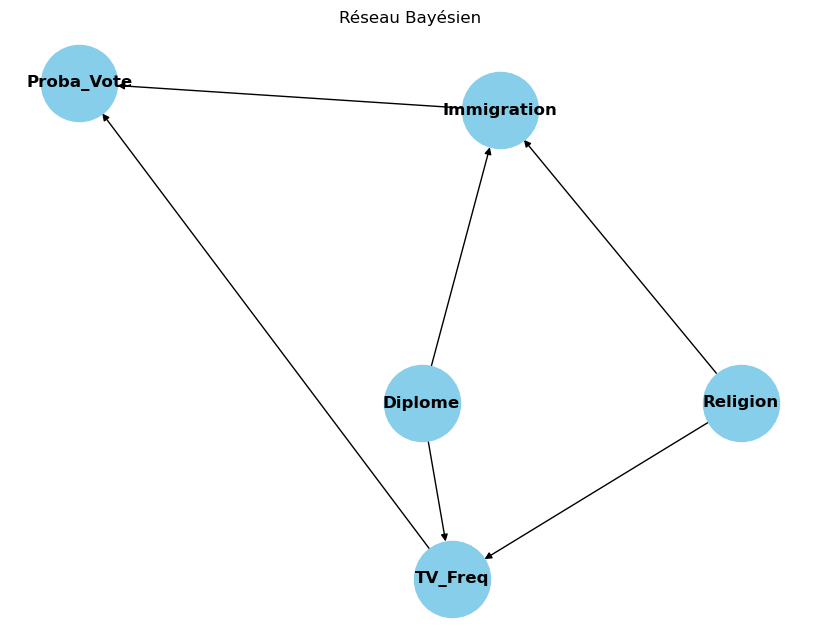

In [60]:
# Représentation graphique du réseau
nx_model = nx.DiGraph()

nx_model.add_nodes_from(model.nodes())
nx_model.add_edges_from(model.edges())

plt.figure(figsize=(8, 6))
pos = nx.spring_layout(nx_model)
nx.draw(nx_model, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=12, font_weight="bold")
plt.title("Réseau Bayésien")
plt.show()

### C. D-séparation

Maintenant que notre réseau bayésien est établi, nous cherchons à déterminer s'il existe un ensemble *d-nœuds*, noté X, qui sépare de manière conditionnelle un ensemble de nœuds Y de l'ensemble de nœuds Z dans notre réseau. Dans ce contexte, la d-séparation signifie que tous les chemins reliant les nœuds de l'ensemble X aux nœuds de l'ensemble Y sont bloqués ou conditionnés par les nœuds de l'ensemble Z. Cette notion est essentielle pour comprendre comment les différentes variables du réseau interagissent conditionnellement les unes par rapport aux autres.






Pour ce faire, nous pouvons commencer par regarder les chemins actifs existant pour chacune de nos variables. Un chemin actif représente une connexion entre deux variables porteuses d'information ou de dépendance dans un graphe.

In [61]:
print(model.active_trail_nodes("Diplome"))
print(model.active_trail_nodes("TV_Freq"))
print(model.active_trail_nodes("Religion"))
print(model.active_trail_nodes("Immigration"))

{'Diplome': {'Immigration', 'TV_Freq', 'Proba_Vote', 'Diplome'}}
{'TV_Freq': {'Immigration', 'TV_Freq', 'Proba_Vote', 'Diplome', 'Religion'}}
{'Religion': {'Immigration', 'TV_Freq', 'Religion', 'Proba_Vote'}}
{'Immigration': {'Immigration', 'TV_Freq', 'Proba_Vote', 'Diplome', 'Religion'}}


À partir de ces chemins actifs, nous regardons lesquels sont entièrement bloqués par une variable Z.

Nous pouvons identifier plusieurs paires de variables qui semblent être d-séparées par une troisième variable.

1. `Diplôme` et `Proba_Vote` sont d-séparées par `Immigration` :en effet, nous observons que la variable `Immigration` se trouve sur le chemin entre `Diplome` et `Proba_Vote`. Ainsi, `Diplome` et `Proba_Vote` sont d-séparées par `Immigration`.

2. `Religion` et `Proba_Vote` sont d-séparées par `TV_Freq` : la variable `TV_Freq` se trouve sur le chemin entre `Religion` et `Proba_Vote`. Par conséquent, `Religion` et `Proba_Vote` sont d-séparées par `TV_Freq`.

### D. Probabilités conditionnelles

Dans notre cas, nous disposons d'un jeu de données que nous souhaitons utiliser pour construire un réseau bayésien. Toutefois, sans connaître les probabilités conditionnelles entre les variables, nous ne pouvons pas définir directement la structure et les paramètres du réseau. Après avoir défini la structure de notre réseau bayésien, nous pouvons estimer les paramètres par maximum de vraisemblance. Cette méthode vise à déterminer les valeurs des paramètres du modèle probabiliste de manière à maximiser la probabilité d'observer les données réelles que nous avons. Ainsi, dans le contexte des réseaux bayésiens, cela revient estimer les probabilités conditionnelles des variables du réseau. La distribution de probabilité conditionnelle représente la probabilité d'une variable étant une certaine valeur, conditionnée par les valeurs des variables parentes de cette variable dans le réseau bayésien.


In [62]:
model.fit(df_final,estimator=MaximumLikelihoodEstimator)
for i in df_final.columns:
  print("Distribution de probabilité conditionnelle de",i)
  print(model.get_cpds(i))

Distribution de probabilité conditionnelle de Proba_Vote
+---------------+-----+------------------+
| Immigration   | ... | Immigration(5.0) |
+---------------+-----+------------------+
| TV_Freq       | ... | TV_Freq(8.0)     |
+---------------+-----+------------------+
| Proba_Vote(0) | ... | 0.5              |
+---------------+-----+------------------+
| Proba_Vote(1) | ... | 0.5              |
+---------------+-----+------------------+
Distribution de probabilité conditionnelle de Immigration
+------------------+-----+---------------+
| Diplome          | ... | Diplome(5.0)  |
+------------------+-----+---------------+
| Religion         | ... | Religion(5.0) |
+------------------+-----+---------------+
| Immigration(1.0) | ... | 0.0           |
+------------------+-----+---------------+
| Immigration(2.0) | ... | 0.0           |
+------------------+-----+---------------+
| Immigration(3.0) | ... | 0.5           |
+------------------+-----+---------------+
| Immigration(4.0) | ... 

Ces résultats montrent donc les distributions de probabilité conditionnelle pour chaque variable dans notre modèle de réseau bayésien, calculées à partir des données fournies. Nous allons les interpréter pour chacune des variables :

1. **Distribution de probabilité conditionnelle de Proba_Vote** :
   On obtient ici la probabilité conditionnelle de la variable `Proba_Vote` en fonction des valeurs de ses parents `Immigration` et `TV_Freq`.
   
   Par exemple, lorsque la variable `Immigration` est égale à 1 (ce qui indique que le répondant considère qu'il y a trop d'immigrés en France) et que `TV_Freq` est égale à 0 (ce qui signifie qu'il ne regarde pas du tout la télévision), la probabilité que `Proba_Vote` soit à 0 (c'est-à-dire que la personne ne vote pas pour notre candidate) est d'environ 0,95, tandis que la probabilité qu'elle vote pour elle est d'environ 0,05.

2. **Distribution de probabilité conditionnelle de Immigration** :
   Cette probabilité conditionnelle de la variable `Immigration` en fonction des valeurs de `Religion` et `Diplome` indique que lorsque la religion du répondant est le catholiscime (`Religion`=1) et qu'il n'a pas de diplôme (`Diplome`=1), la probabilité qu'il pense qu'il y ait trop d'immigrés en France (`Immigration`=1) est moyenne, s'élevant à 0.33.

3. **Distribution de probabilité conditionnelle de TV_Freq** :
   La probabilité conditionnelle de la variable `TV_Freq` est définie en fonction des valeurs de `Diplome` et `Religion`.
   
   Par exemple, lorsque le répondant est sans diplôme (`Diplome`=1) et qu'il est catholique pratiquant (`Religion`=1), alors la probabilité qu'il ne regarde pas du tout la télévision (`TV_Freq`=0) est d'environ 0.01.

4. **Distribution de probabilité conditionnelle de Diplome** :
   La variable `Diplome` ne possède pas de probabilité conditionnelle, car elle n'est influencée par aucune autre variable dans notre réseau. Ainsi, nous observons que la probabilité pour le répondant de ne posséder aucun diplôme (`Diplome`=1) est d'environ 0.276, tandis que sa probabilité d'avoir un diplôme de l'enseignement supérieur est de 0.106.

5. **Distribution de probabilité conditionnelle de Religion** :
   Tout comme la variable de contexte `Diplome`, la variable `Religion` ne présente que des probabilités simples pour ses différentes modalités.
   On remarque que probabilité qu'une personne soit catholique pratiquante  (`Religion`=1) est d'environ 0.083, tandis que la probabilité qu'elle soit catholique mais non pratiquante (`Religion`=2) est de 0.561416.


### E. *Backdoor criterion* et *adjustment*

Parmi les méthodes d'apprentissage de notre réseau bayéisen, il existe le critère de la porte dérobée, ou backdoor criterion, qui est une méthode utilisée en inférence causale pour identifier les variables qui doivent être conditionnées afin d'estimer correctement l'effet causal entre une variable d'entrée et une variable de sortie, en présence de variables de confusion.

L'idée fondamentale derrière le critère de la porte dérobée est de trouver un chemin causal entre la variable d'entrée et la variable de sortie qui ne passe pas par les variables de confusion. Ce chemin est alors appelé "chemin de backdoor". Pour cela, une variable est considérée comme une porte dérobée si elle remplit deux critères :
- Elle n'est pas un prédicteur de notre variable de sortie.
- Elle bloque tous les chemins entre la variable d'entrée et la variable de sortie qui passent par les variables de confusion.

En identifiant et en conditionnant les variables qui satisfont le critère de la porte dérobée, il est possible de contrôler l'effet des variables de confusion et d'estimer l'effet causal de la variable d'entrée sur la variable de sortie de manière non biaisée. Cette méthode d'ajustement est appelée ajustement de la porte dérobée.

Nous allons alors étudier ce critère dans notre réseau bayésien, entre les variables `Immigration` et `TV_Freq` avec notre variable de sortie `Proba_Vote`.

In [63]:
inference = CausalInference(model)
inference.get_all_backdoor_adjustment_sets(X="Immigration", Y="Proba_Vote")

frozenset({frozenset({'TV_Freq'}), frozenset({'Diplome', 'Religion'})})

Nous constatons qu'il est nécessaire de prendre en compte soit la variable `TV_Freq` seule, soit les variables `Diplome` et `Religion` conjointement pour étudier adéquatement l'effet de l'`Immigration` sur la `Proba_Vote`. Cela signifie que ces variables agissent comme des variables de confondement potentielles qui peuvent biaiser notre analyse si elles ne sont pas correctement contrôlées. En contrôlant ces variables, nous sommes en mesure d'identifier et d'isoler l'effet causal direct de l'`Immigration` sur la `Proba_Vote`.

In [64]:
inference.get_all_backdoor_adjustment_sets(X="TV_Freq", Y="Proba_Vote")

frozenset({frozenset({'Diplome', 'Religion'}), frozenset({'Immigration'})})

De plus, nous constatons que pour analyser correctement l'impact de la variable `TV_Freq` sur la `Proba_Vote`, il est nécessaire de prendre en considération soit la variable `Immigration` isolément, soit les variables `Diplôme` et `Religion` ensemble. Ces variables agissent également comme des facteurs de confusion potentiels, nécessitant ainsi leur contrôle pour évaluer précisément l'effet causal de `TV_Freq` sur `Proba_Vote`.


### F. Exemple fictif afin de calculer la probabilité de vote envers D. Voynet

Enfin, une fois que notre réseau bayésien a été soigneusement construit et analysé, nous sommes en mesure d'estimer la probabilité de vote en faveur de notre candidate des Verts en fonction de plusieurs profils fictifs que nous définissons.

In [65]:
model.get_state_probability({'Diplome': 1, 'Religion': 4})

0.07960435429555959

Pour commencer, considérons un répondant sans diplôme ni aucune appartenance religieuse. Nous constatons que sa probabilité de voter en faveur de Dominique Voynet est très faible, atteignant seulement environ 8%.

In [66]:
model.get_state_probability({ 'Immigration':2,'TV_Freq':7})

0.15159198310976743

Maintenant, imaginons un répondant qui regarde la télévision quotidiennement et qui pense que le niveau d'immigration en France est élevé. Dans ce cas, sa probabilité de voter pour notre candidat est de 15%.

In [67]:
model.get_state_probability({'Diplome': 5, 'Religion': 2, "TV_Freq" :4 })

0.007694604000241792

En prenant en considération un répondant possédant un diplôme de l'enseignement supérieur, étant catholique non pratiquant et regardant en moyenne la télévision quatre jours par semaine, il semble que cette personne ait une probabilité de vote pour Dominique Voynet inférieure à 1%, soit pratiquement nulle.

In [68]:
model.get_state_probability({'Diplome': 2, 'Religion': 1, "TV_Freq" : 0, "Immigration":1})

0.0003400664111632827

Enfin, une personne catholique pratiquante, titulaire d'un baccalauréat, ne regardant pas du tout la télévision et percevant une présence excessive d'immigrés en France, semble avoir très peu de chances de voter en faveur de notre candidate.

Ces dernières probabilités faibles sont également dûes au faible soutien qu'a obtenu notre candidate lors de l'élection présidentielle de 2007. Elle n'a recueilli que 576 666 votes au premier tour, ce qui représentait seulement 1,57% des suffrages exprimés.

# CONCLUSION

Dans le cadre de ce projet, nous avons étudié la probabilité de voter pour la candidate Dominique Voynet à l'aide des données issues des résultats de la première vague du baromètre politique concernant les élections présidentielles de 2007.

Pour ce faire, nous avons d'abord effectué une sélection des variables ayant le plus d'influence sur la probabilité de vote en faveur de D. Voynet. Cette sélection de variables a été réalisée à l'aide de deux méthodes : la première étant la minimisation des critères AIC et BIC de diverses régressions logistiques, et la seconde étant l'application d'un Group Lasso sur notre base de données. Nous avons donc sélectionné les variables les plus influentes communes entre ces deux méthodes.

Ensuite, nous avons construit un réseau bayésien modélisant les interactions entre nos variables ainsi qu'avec la probabilité de vote. Nous avons tiré quelques observations, notamment le fait que certaines variables se trouvaient dans le chemin de deux autres (principe de d-séparation), mais nous avons également pu interpréter les probabilités conditionnelles de nos variables entre elles, ce qui nous a permis de mesurer l'influence d'une variable sur une autre.

La construction de ce réseau bayésien nous a ainsi permis de mettre en lumière visuellement les interactions et les influences de nos variables. De plus, elle nous a également permis de créer des exemples fictifs de répondants afin de prédire leur probabilité de vote en faveur de notre candidate Dominique Voynet.